**Smoking Signals of Body Classification**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**LOADING DATASET**

In [3]:
data=pd.read_csv('/content/signal_smoking.csv')

**This dataset is a collection of basic health biological signal data.The goal is to determine the presence or absence of smoking through bio-signals.target variable: NO smoking = 0, YES smoking = 1**

In [4]:
data=data.drop("ID", axis = 1)

In [5]:
data

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,F,40,155,60,81.3,1.2,1.0,1,1,114,...,12.9,1,0.7,18,19,27,Y,0,Y,0
1,F,40,160,60,81.0,0.8,0.6,1,1,119,...,12.7,1,0.6,22,19,18,Y,0,Y,0
2,M,55,170,60,80.0,0.8,0.8,1,1,138,...,15.8,1,1.0,21,16,22,Y,0,N,1
3,M,40,165,70,88.0,1.5,1.5,1,1,100,...,14.7,1,1.0,19,26,18,Y,0,Y,0
4,F,40,155,60,86.0,1.0,1.0,1,1,120,...,12.5,1,0.6,16,14,22,Y,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,F,40,170,65,75.0,0.9,0.9,1,1,110,...,12.3,1,0.6,14,7,10,Y,1,Y,0
55688,F,45,160,50,70.0,1.2,1.2,1,1,101,...,14.0,1,0.9,20,12,14,Y,0,Y,0
55689,F,55,160,50,68.5,1.0,1.2,1,1,117,...,12.4,1,0.5,17,11,12,Y,0,N,0
55690,M,60,165,60,78.0,0.8,1.0,1,1,133,...,14.4,1,0.7,20,19,18,Y,0,N,0


**Explore the number of rows and columns, ranges of values**

In [6]:
len(data)

55692

In [7]:
data.shape

(55692, 26)

In [8]:
ncolumn = data.shape[1]
ncolumn


26

In [9]:
nrow = data.shape[0]
nrow

55692

In [10]:
data.head()


,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,F,40,155,60,81.3,1.2,1.0,1,1,114,...,12.9,1,0.7,18,19,27,Y,0,Y,0
1,F,40,160,60,81.0,0.8,0.6,1,1,119,...,12.7,1,0.6,22,19,18,Y,0,Y,0
2,M,55,170,60,80.0,0.8,0.8,1,1,138,...,15.8,1,1.0,21,16,22,Y,0,N,1
3,M,40,165,70,88.0,1.5,1.5,1,1,100,...,14.7,1,1.0,19,26,18,Y,0,Y,0
4,F,40,155,60,86.0,1.0,1.0,1,1,120,...,12.5,1,0.6,16,14,22,Y,0,N,0


**Check null Values**

In [11]:
print("\nThere are totally {} null values in the dataset".format(data.isnull().sum().sum()))


There are totally 0 null values in the dataset


**Change Column Names***

In [12]:
data.rename(columns={'height(cm)':'height', 'weight(kg)':'weight','waist(cm)':'waist',
                        'eyesight(left)':'eyesight_left', 'eyesight(right)':'eyesight_right',
                        'hearing(left)':'hearing_left', 'hearing(right)':'hearing_right',
                        'fasting blood sugar':'fasting_blood_sugar',  'Cholesterol':'cholesterol', 
                        'HDL':'hdl','LDL':'ldl','Urine protein':'urine_protein', 
                        'serum creatinine':'serum_creatinine', 'AST':'ast','ALT':'alt',
                        'Gtp':'gtp', 'dental caries' : 'dental_caries'}, inplace=True)

In [13]:
data

,gender,age,height,weight,waist,eyesight_left,eyesight_right,hearing_left,hearing_right,systolic,...,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,oral,dental_caries,tartar,smoking
0,F,40,155,60,81.3,1.2,1.0,1,1,114,...,12.9,1,0.7,18,19,27,Y,0,Y,0
1,F,40,160,60,81.0,0.8,0.6,1,1,119,...,12.7,1,0.6,22,19,18,Y,0,Y,0
2,M,55,170,60,80.0,0.8,0.8,1,1,138,...,15.8,1,1.0,21,16,22,Y,0,N,1
3,M,40,165,70,88.0,1.5,1.5,1,1,100,...,14.7,1,1.0,19,26,18,Y,0,Y,0
4,F,40,155,60,86.0,1.0,1.0,1,1,120,...,12.5,1,0.6,16,14,22,Y,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,F,40,170,65,75.0,0.9,0.9,1,1,110,...,12.3,1,0.6,14,7,10,Y,1,Y,0
55688,F,45,160,50,70.0,1.2,1.2,1,1,101,...,14.0,1,0.9,20,12,14,Y,0,Y,0
55689,F,55,160,50,68.5,1.0,1.2,1,1,117,...,12.4,1,0.5,17,11,12,Y,0,N,0
55690,M,60,165,60,78.0,0.8,1.0,1,1,133,...,14.4,1,0.7,20,19,18,Y,0,N,0


In [14]:
data.shape

(55692, 26)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  object 
 1   age                  55692 non-null  int64  
 2   height               55692 non-null  int64  
 3   weight               55692 non-null  int64  
 4   waist                55692 non-null  float64
 5   eyesight_left        55692 non-null  float64
 6   eyesight_right       55692 non-null  float64
 7   hearing_left         55692 non-null  int64  
 8   hearing_right        55692 non-null  int64  
 9   systolic             55692 non-null  int64  
 10  relaxation           55692 non-null  int64  
 11  fasting_blood_sugar  55692 non-null  int64  
 12  cholesterol          55692 non-null  int64  
 13  triglyceride         55692 non-null  int64  
 14  hdl                  55692 non-null  int64  
 15  ldl                  55692 non-null 

In [16]:
data.describe().T.style.background_gradient(cmap = "coolwarm_r")

,count,mean,std,min,25%,50%,75%,max
age,55692.000000,44.182917,12.071418,20.000000,40.000000,40.000000,55.000000,85.000000
height,55692.000000,164.649321,9.194597,130.000000,160.000000,165.000000,170.000000,190.000000
weight,55692.000000,65.864936,12.820306,30.000000,55.000000,65.000000,75.000000,135.000000
waist,55692.000000,82.046418,9.274223,51.000000,76.000000,82.000000,88.000000,129.000000
eyesight_left,55692.000000,1.012623,0.486873,0.100000,0.800000,1.000000,1.200000,9.900000
eyesight_right,55692.000000,1.007443,0.485964,0.100000,0.800000,1.000000,1.200000,9.900000
hearing_left,55692.000000,1.025587,0.157902,1.000000,1.000000,1.000000,1.000000,2.000000
hearing_right,55692.000000,1.026144,0.159564,1.000000,1.000000,1.000000,1.000000,2.000000
systolic,55692.000000,121.494218,13.675989,71.000000,112.000000,120.000000,130.000000,240.000000
relaxation,55692.000000,76.004830,9.679278,40.000000,70.000000,76.000000,82.000000,146.000000


**Bar plot**

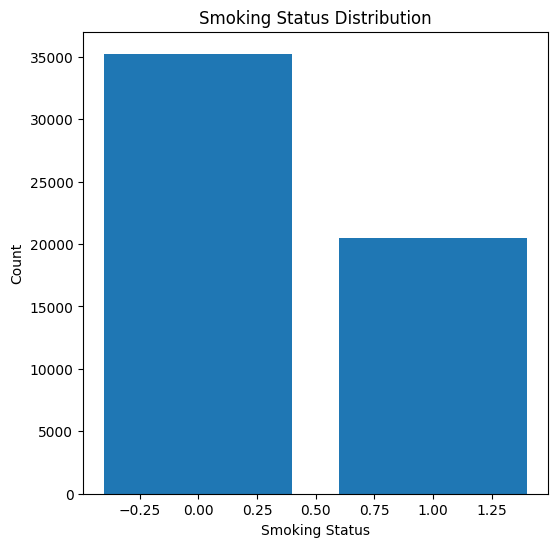

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
smoking_counts = data['smoking'].value_counts()
plt.bar(smoking_counts.index, smoking_counts.values)
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.title('Smoking Status Distribution')

plt.show()

<Figure size 1000x600 with 0 Axes>

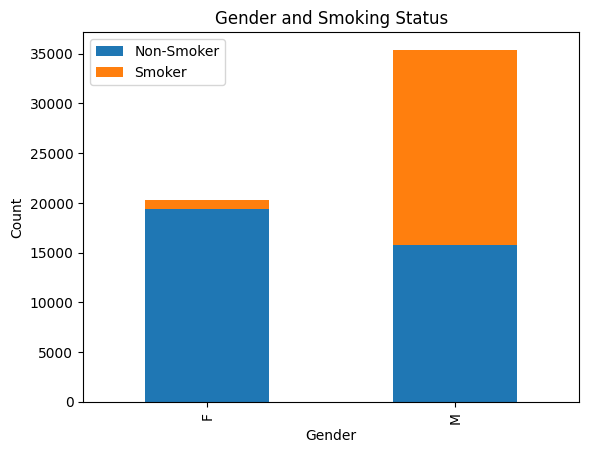

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
gender_smoking_counts = data.groupby(['gender', 'smoking']).size().unstack()
gender_smoking_counts.plot(kind='bar', stacked=True)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender and Smoking Status')
plt.legend(['Non-Smoker', 'Smoker'])

plt.show()


<Figure size 1000x600 with 0 Axes>

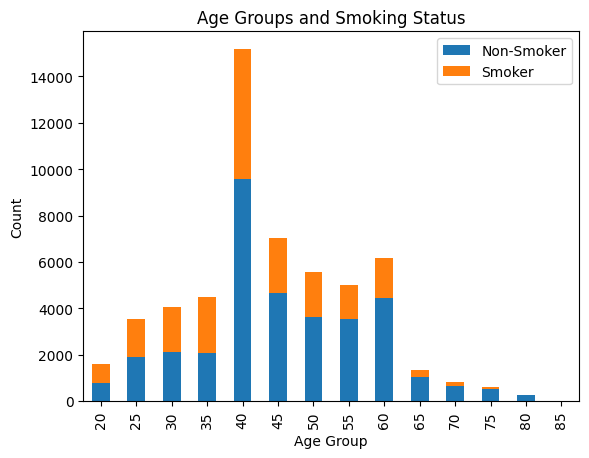

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
age_smoking_counts = data.groupby(['age', 'smoking']).size().unstack()
age_smoking_counts.plot(kind='bar', stacked=True)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Groups and Smoking Status')
plt.legend(['Non-Smoker', 'Smoker'])

plt.show()


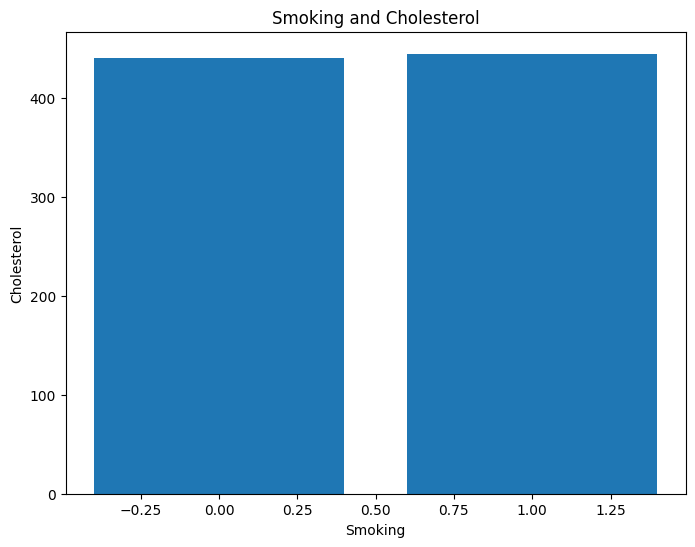

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(data['smoking'], data['cholesterol'])
plt.xlabel('Smoking')
plt.ylabel('Cholesterol')
plt.title('Smoking and Cholesterol')

plt.show()


In [21]:
summary=data.groupby(["gender","smoking"])["age","weight","height"].mean().round(0)
summary

<ipython-input-21-42c1fff26cbe>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  summary=data.groupby(["gender","smoking"])["age","weight","height"].mean().round(0)


age  weight  height
gender smoking                      
F      0        49.0    56.0   156.0
       1        46.0    56.0   157.0
M      0        42.0    71.0   170.0
       1        41.0    72.0   170.0

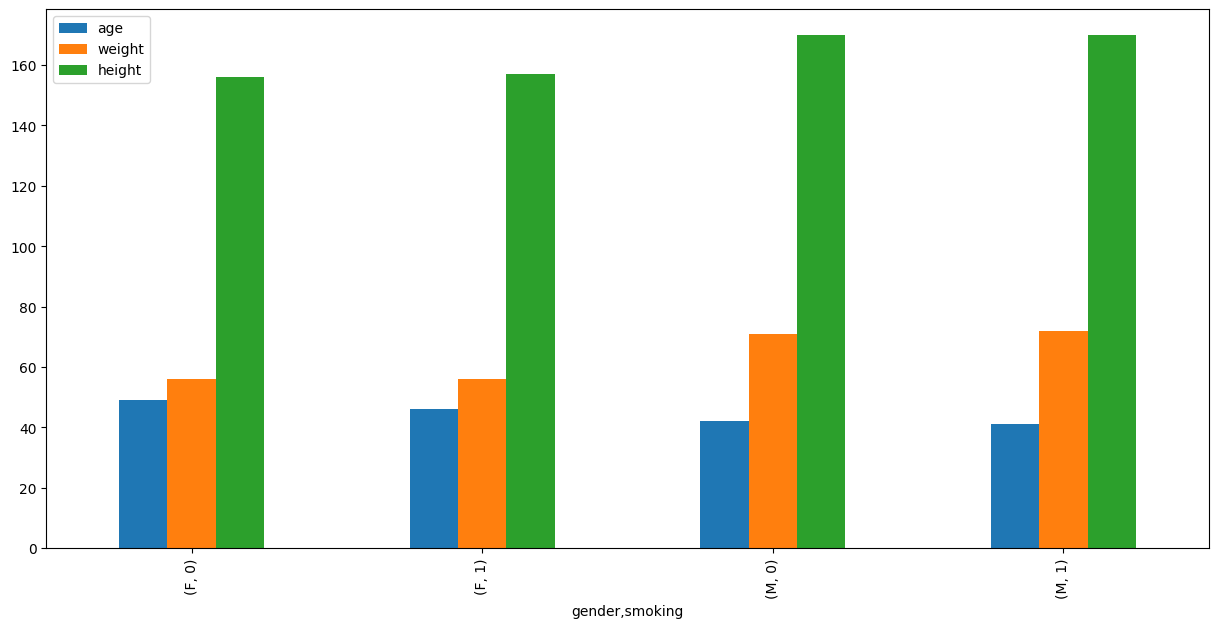

In [22]:
# graph the group by
summary.plot(kind="bar",figsize=(15,7))
plt.show()

**Histogram**

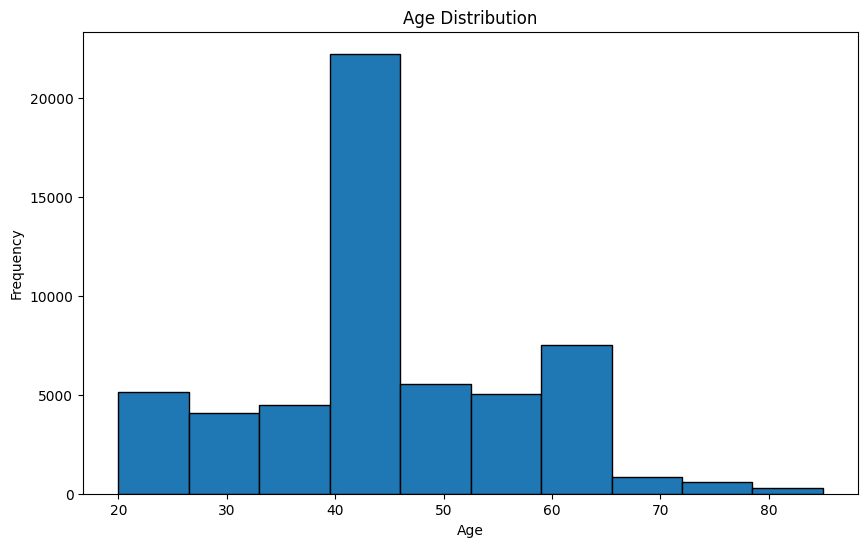

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(data['age'], bins=10, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

plt.show()


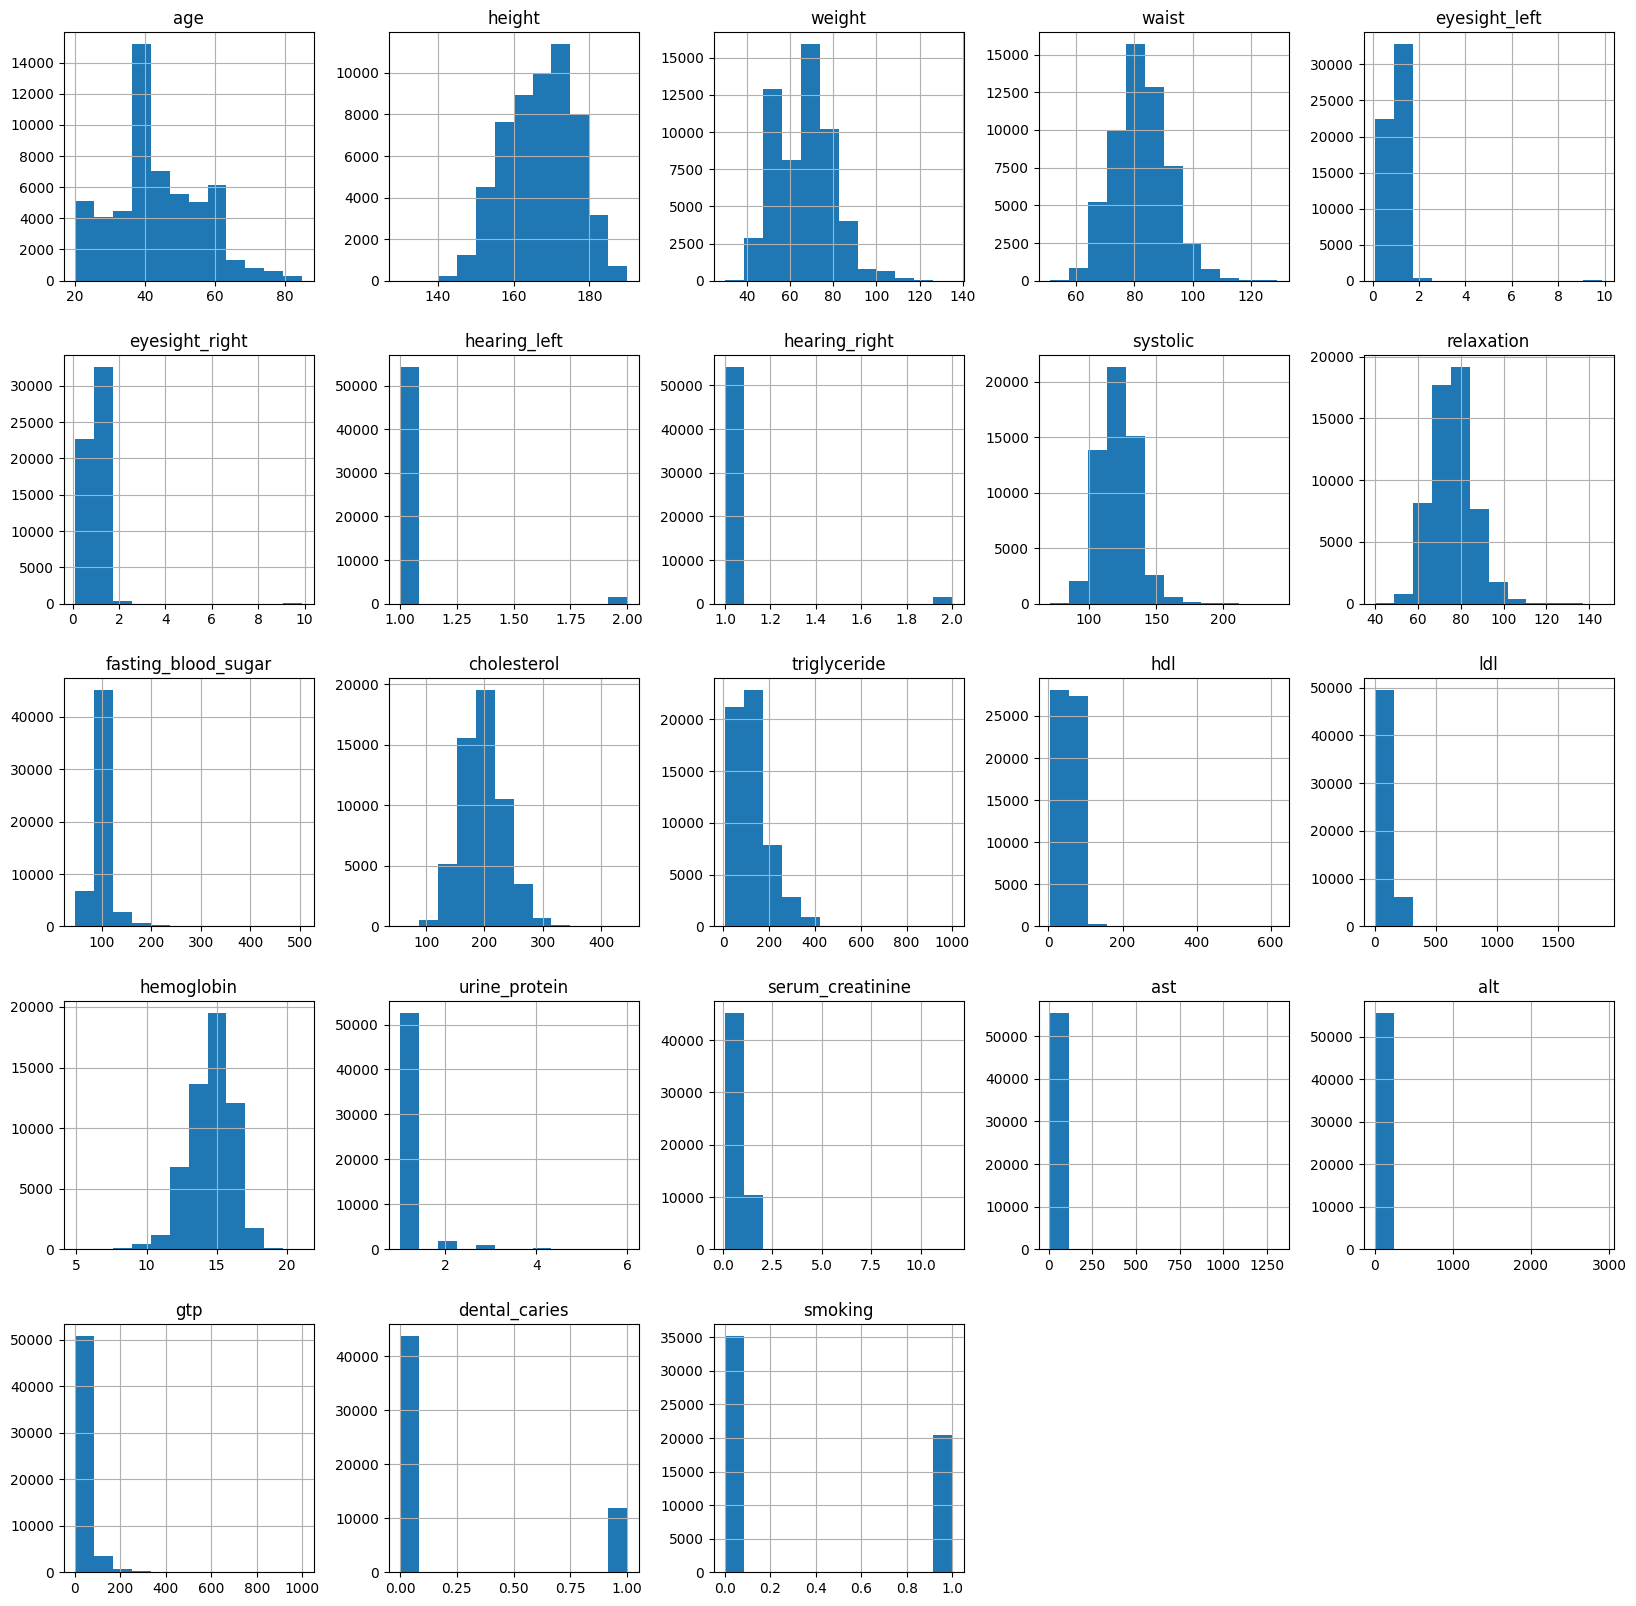

In [24]:
data.hist(figsize = (20, 20), bins = 12, legend = False);


**Pie chart**

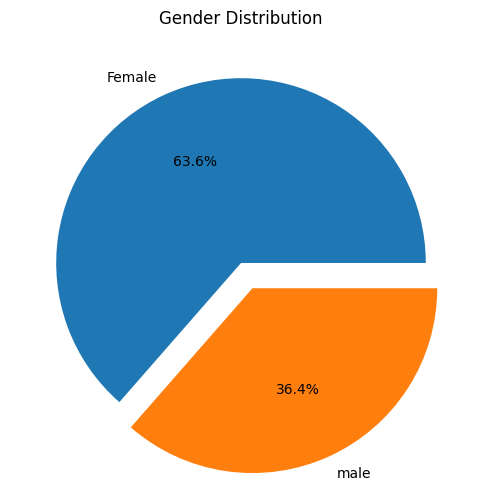

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
labels = ['Female', 'male']
sizes = [data['gender'].value_counts()[0], data['gender'].value_counts()[1]]
plt.pie(sizes, labels=labels, autopct='%1.1f%%',explode = [0, 0.15])
plt.title('Gender Distribution')

plt.show()


**Catplot**

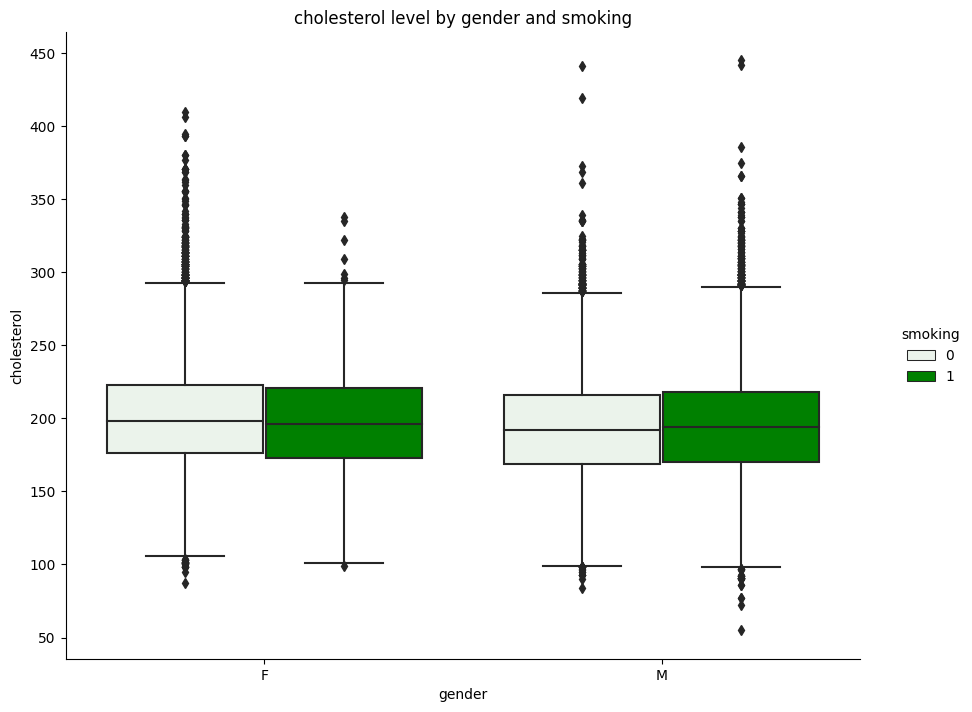

In [26]:
sns.catplot(x = "gender",
            y = "cholesterol",
            kind = "box",
            hue = "smoking",
            color = 'g',
            data = data, saturation = 1, height = 7, aspect = 1.3,
            margin_titles = True).set(title = "cholesterol level by gender and smoking");

**Box plot**

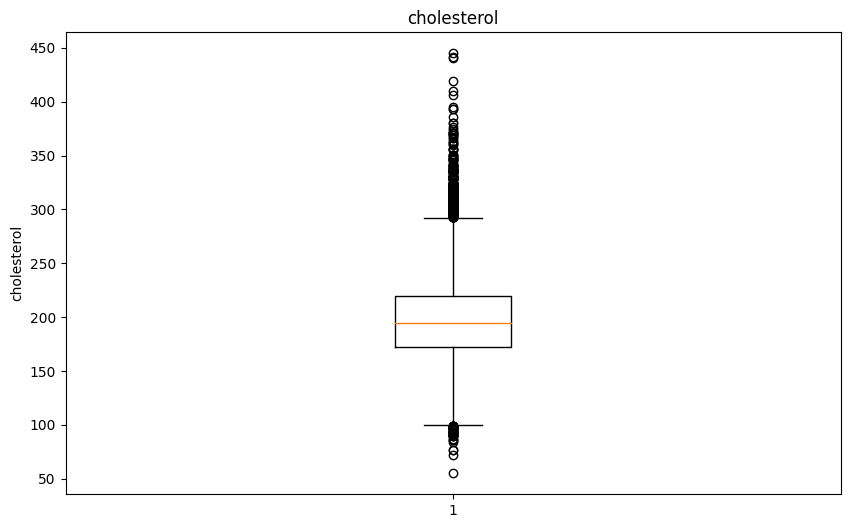

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.boxplot(data['cholesterol'])
plt.ylabel('cholesterol')
plt.title('cholesterol')

plt.show()


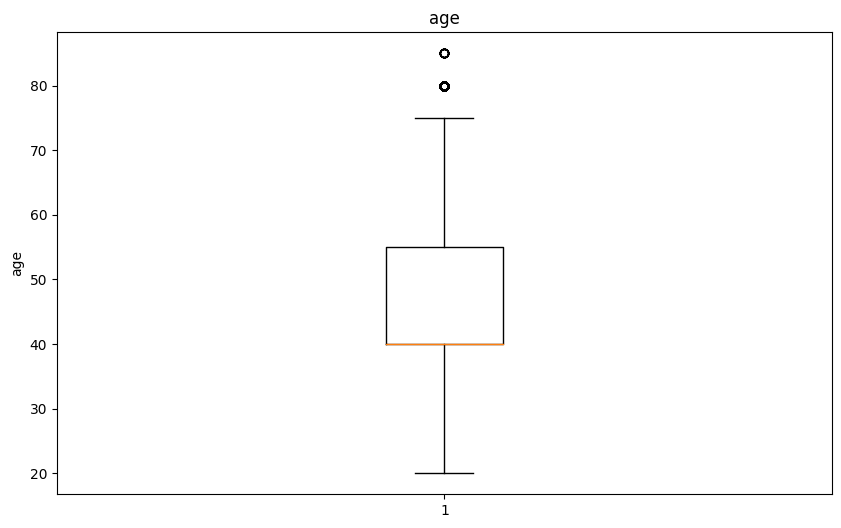

In [28]:
plt.figure(figsize=(10, 6))
plt.boxplot(data["age"])
plt.ylabel('age')
plt.title('age')

plt.show()

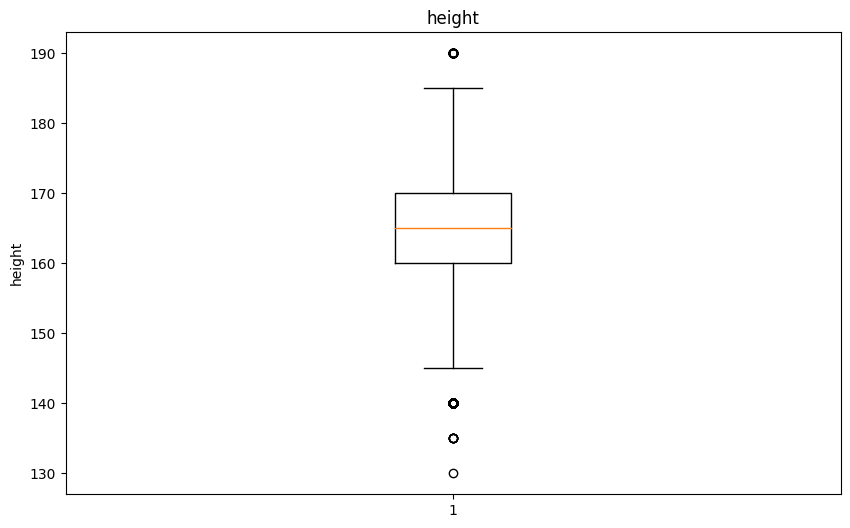

In [29]:
plt.figure(figsize=(10, 6))
plt.boxplot(data["height"])
plt.ylabel('height')
plt.title('height')

plt.show()

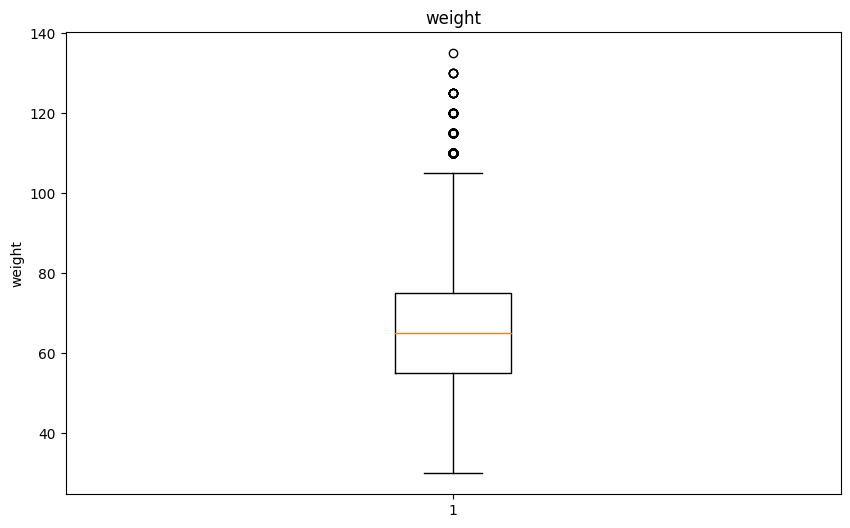

In [30]:
plt.figure(figsize=(10, 6))
plt.boxplot(data["weight"])
plt.ylabel('weight')
plt.title('weight')

plt.show()

**Scatter Matrix plot**

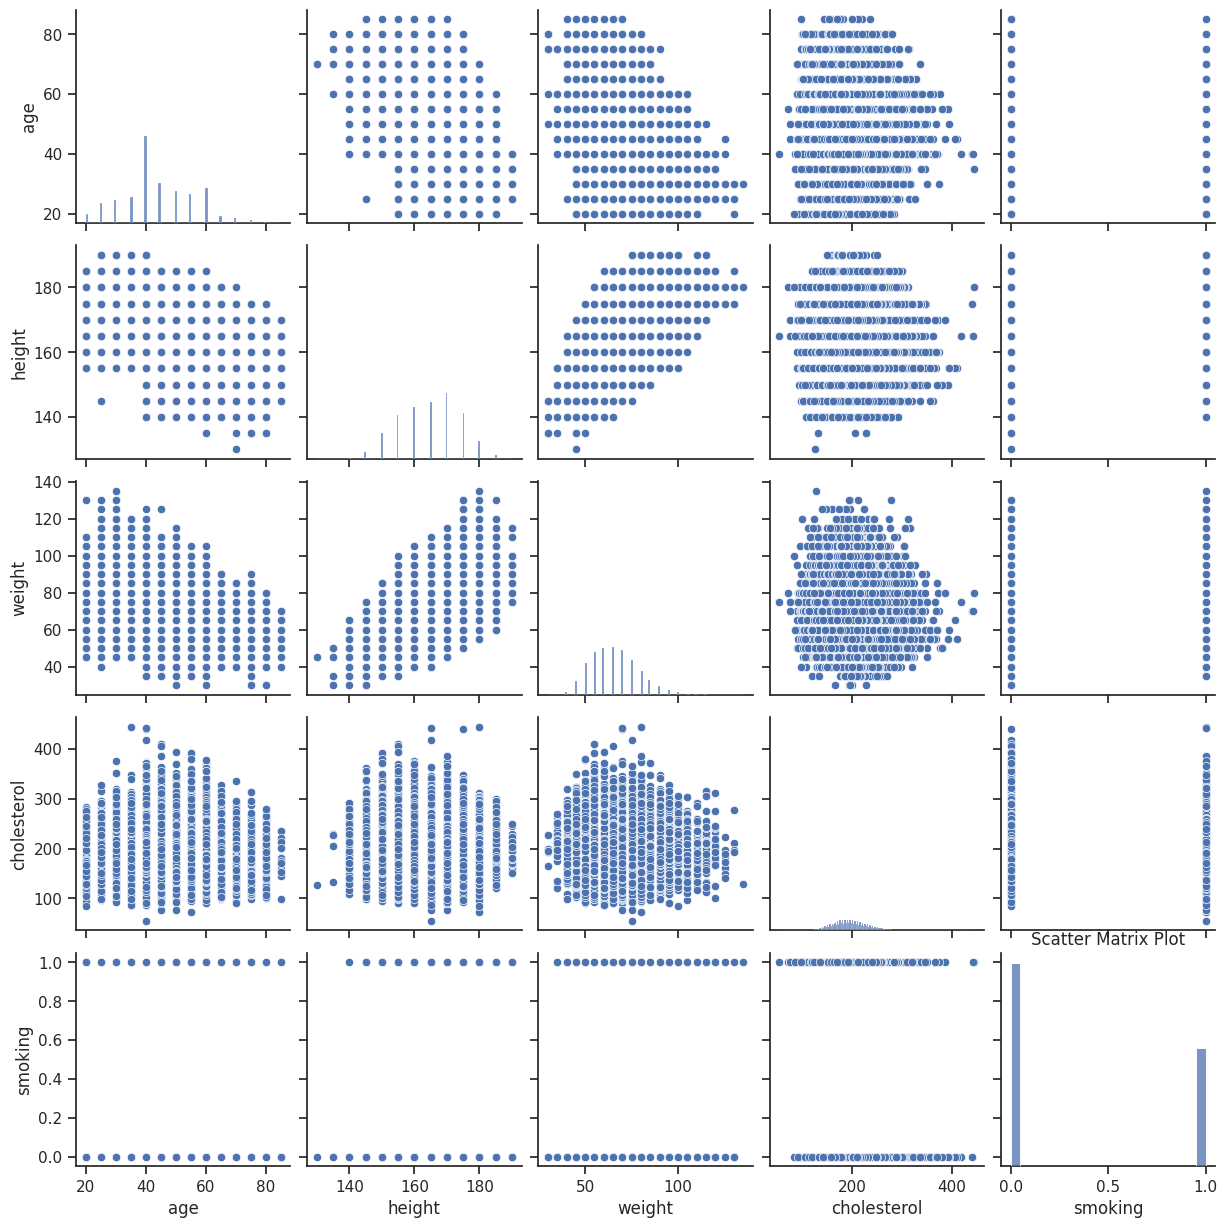

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

subset_data = data[['age', 'height', 'weight', 'cholesterol', 'smoking']]
sns.set(style='ticks')
sns.pairplot(subset_data)
plt.title('Scatter Matrix Plot')

plt.show()


**Plots Regarding target variable**

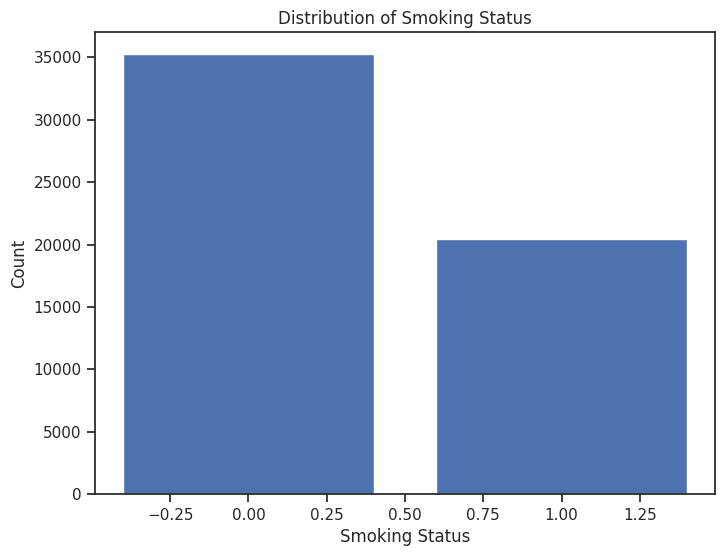

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
target_counts = data['smoking'].value_counts()
plt.bar(target_counts.index, target_counts.values)
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.title('Distribution of Smoking Status')

plt.show()


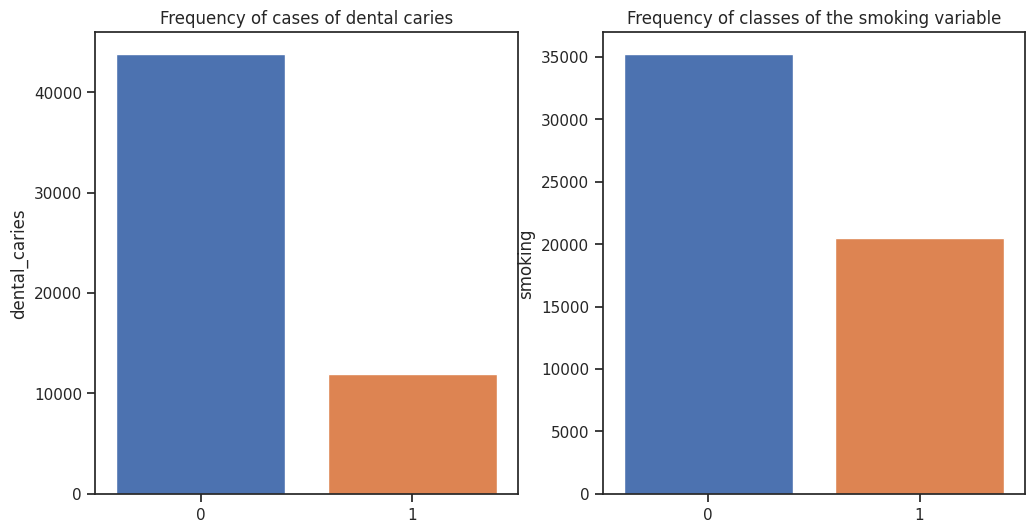

In [33]:
fig, axes = plt.subplots(1, 2, figsize = (12, 6))
axes = axes.flatten()

sns.barplot(ax = axes[0],
            x = data["dental_caries"].value_counts().index,
            y = data["dental_caries"].value_counts(),
            data = data, saturation = 1).set(title = "Frequency of cases of dental caries");
sns.barplot(ax = axes[1],
            x = data["smoking"].value_counts().index,
            y = data["smoking"].value_counts(),
            data = data, saturation = 1).set(title = "Frequency of classes of the smoking variable");
            


**Exploratory data analysis**

**Heatmap**

<ipython-input-34-931d3b4de66a>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


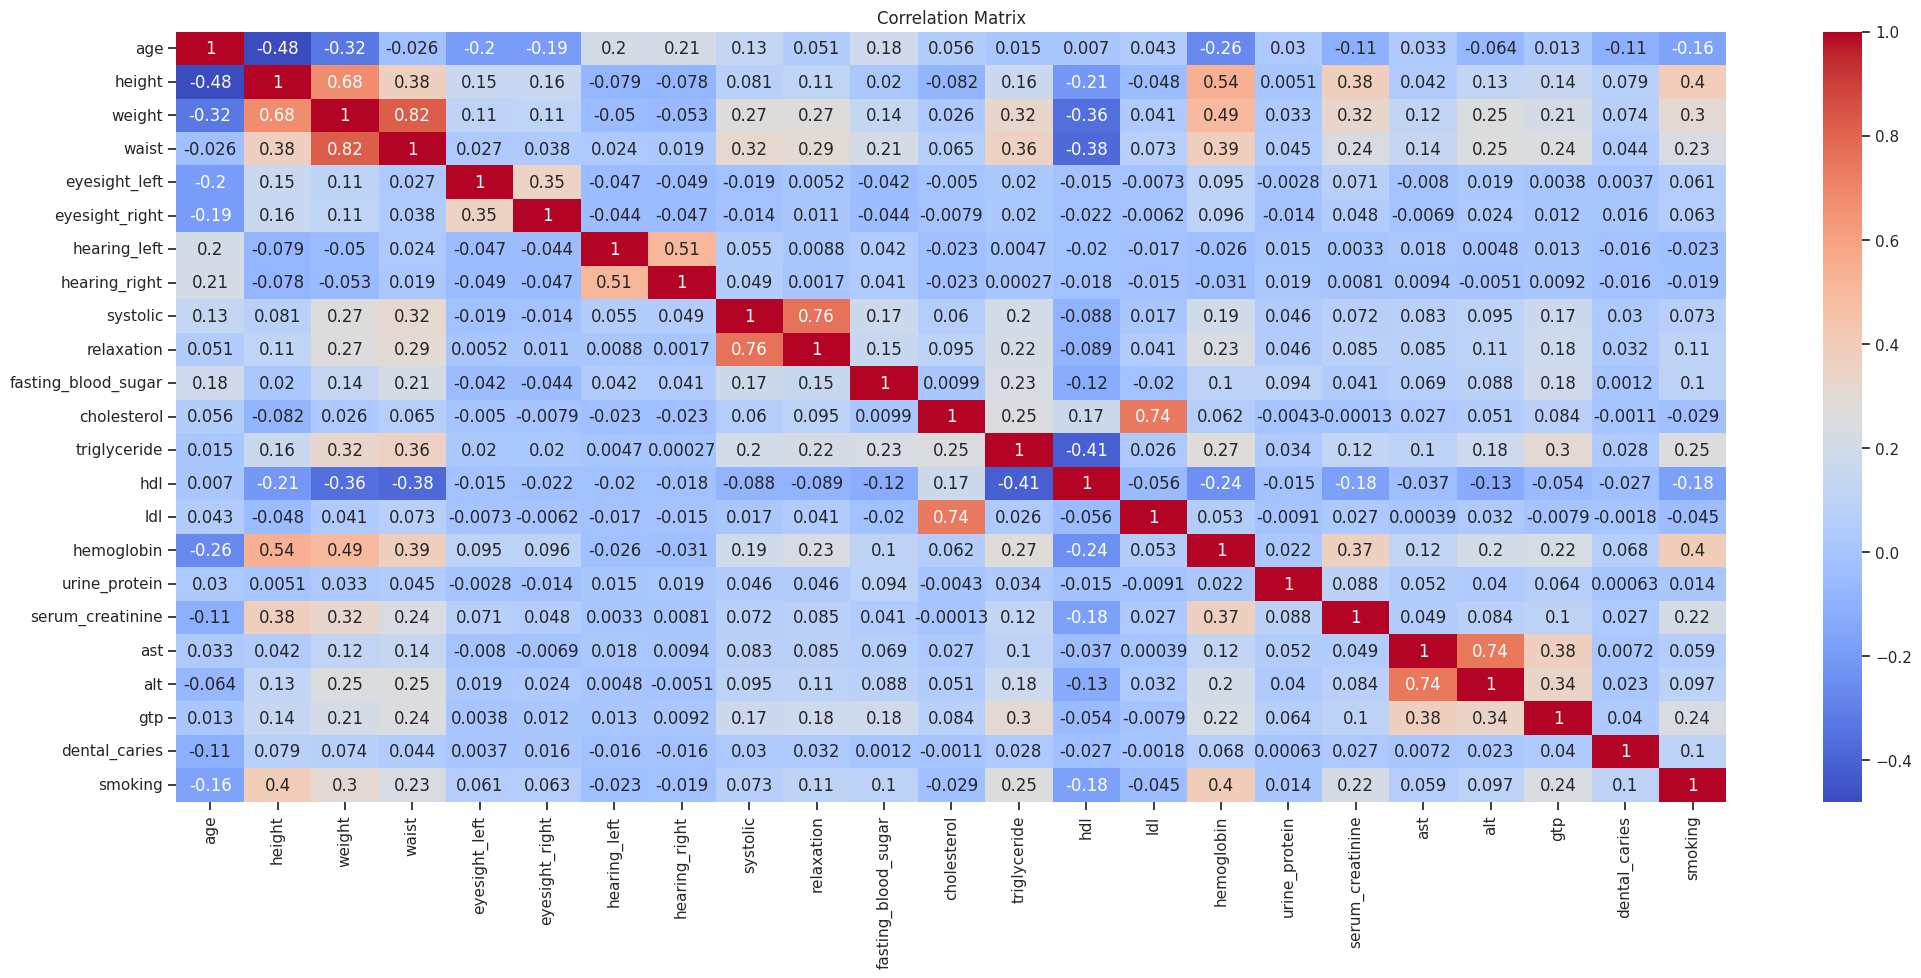

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25, 10))
corr_matrix = data.corr()  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

plt.show()


**Pie chart containing gender and smoking**

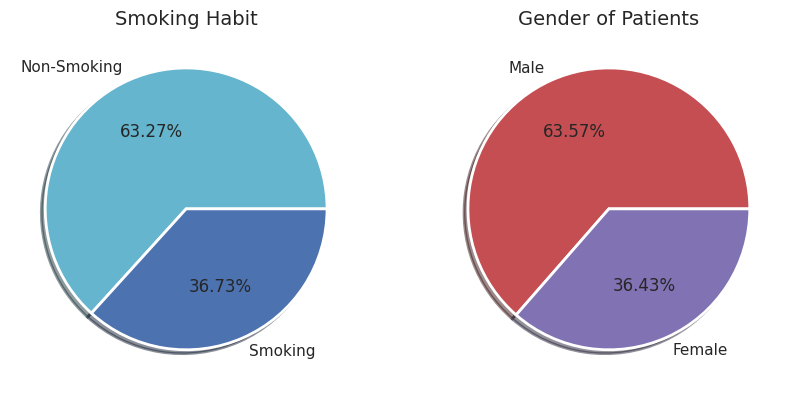

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Subplot 1: Smoking Habit
plt.subplot(121)
plt.pie(data['smoking'].value_counts(), labels=['Non-Smoking', 'Smoking'],
        autopct="%1.2f%%", colors=["c", "b"],
        wedgeprops=dict(width=1, edgecolor='w', linewidth=2), shadow=True)
plt.title('Smoking Habit', fontsize=14)

# Subplot 2: Gender of Patients
plt.subplot(122)
plt.pie(data['gender'].value_counts(), labels=['Male', 'Female'],
        autopct="%1.2f%%", colors=["r", "m"],
        wedgeprops=dict(width=1, edgecolor='w', linewidth=2), shadow=True)
plt.title('Gender of Patients', fontsize=14)


plt.show()


In [36]:
data.columns

Index(['gender', 'age', 'height', 'weight', 'waist', 'eyesight_left',
       'eyesight_right', 'hearing_left', 'hearing_right', 'systolic',
       'relaxation', 'fasting_blood_sugar', 'cholesterol', 'triglyceride',
       'hdl', 'ldl', 'hemoglobin', 'urine_protein', 'serum_creatinine', 'ast',
       'alt', 'gtp', 'oral', 'dental_caries', 'tartar', 'smoking'],
      dtype='object')

In [37]:
data.head(n = 10).style.background_gradient(cmap = "Oranges")

,gender,age,height,weight,waist,eyesight_left,eyesight_right,hearing_left,hearing_right,systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,oral,dental_caries,tartar,smoking
0,F,40,155,60,81.300000,1.200000,1.000000,1,1,114,73,94,215,82,73,126,12.900000,1,0.700000,18,19,27,Y,0,Y,0
1,F,40,160,60,81.000000,0.800000,0.600000,1,1,119,70,130,192,115,42,127,12.700000,1,0.600000,22,19,18,Y,0,Y,0
2,M,55,170,60,80.000000,0.800000,0.800000,1,1,138,86,89,242,182,55,151,15.800000,1,1.000000,21,16,22,Y,0,N,1
3,M,40,165,70,88.000000,1.500000,1.500000,1,1,100,60,96,322,254,45,226,14.700000,1,1.000000,19,26,18,Y,0,Y,0
4,F,40,155,60,86.000000,1.000000,1.000000,1,1,120,74,80,184,74,62,107,12.500000,1,0.600000,16,14,22,Y,0,N,0
5,M,30,180,75,85.000000,1.200000,1.200000,1,1,128,76,95,217,199,48,129,16.200000,1,1.200000,18,27,33,Y,0,Y,0
6,M,40,160,60,85.500000,1.000000,1.000000,1,1,116,82,94,226,68,55,157,17.000000,1,0.700000,21,27,39,Y,1,Y,1
7,M,45,165,90,96.000000,1.200000,1.000000,1,1,153,96,158,222,269,34,134,15.000000,1,1.300000,38,71,111,Y,0,Y,0
8,F,50,150,60,85.000000,0.700000,0.800000,1,1,115,74,86,210,66,48,149,13.700000,1,0.800000,31,31,14,Y,0,N,0
9,M,45,175,75,89.000000,1.000000,1.000000,1,1,113,64,94,198,147,43,126,16.000000,1,0.800000,26,24,63,Y,0,N,0


**Dropping Outliers**

In [38]:
from collections import Counter

In [39]:
def outlier_detection(data, n, columns):
    rows = []
    will_drop_train = []
    for col in columns:
        Q1 = np.nanpercentile(data[col], 25)
        Q3 = np.nanpercentile(data[col], 75)
        IQR = Q3 - Q1
        outlier_point = 1.5 * IQR
        rows.extend(data[(data[col] < Q1 - outlier_point)|(data[col] > Q3 + outlier_point)].index)
    for r, c in Counter(rows).items():
        if c >= n: will_drop_train.append(r)
    return will_drop_train

will_drop_train = outlier_detection(data, 5, data.select_dtypes(["float", "int"]).columns)
will_drop_train[0:5]

[44, 3368, 3592, 4171, 4738]

In [40]:
data.drop(will_drop_train, inplace = True, axis = 0)

**Encode Categoric Variables**

In [41]:
from sklearn.preprocessing import LabelEncoder

for col in ['gender','tartar','oral']:
    data[col] = LabelEncoder().fit_transform(data[col])
data.head(10)

,gender,age,height,weight,waist,eyesight_left,eyesight_right,hearing_left,hearing_right,systolic,...,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,oral,dental_caries,tartar,smoking
0,0,40,155,60,81.3,1.2,1.0,1,1,114,...,12.9,1,0.7,18,19,27,0,0,1,0
1,0,40,160,60,81.0,0.8,0.6,1,1,119,...,12.7,1,0.6,22,19,18,0,0,1,0
2,1,55,170,60,80.0,0.8,0.8,1,1,138,...,15.8,1,1.0,21,16,22,0,0,0,1
3,1,40,165,70,88.0,1.5,1.5,1,1,100,...,14.7,1,1.0,19,26,18,0,0,1,0
4,0,40,155,60,86.0,1.0,1.0,1,1,120,...,12.5,1,0.6,16,14,22,0,0,0,0
5,1,30,180,75,85.0,1.2,1.2,1,1,128,...,16.2,1,1.2,18,27,33,0,0,1,0
6,1,40,160,60,85.5,1.0,1.0,1,1,116,...,17.0,1,0.7,21,27,39,0,1,1,1
7,1,45,165,90,96.0,1.2,1.0,1,1,153,...,15.0,1,1.3,38,71,111,0,0,1,0
8,0,50,150,60,85.0,0.7,0.8,1,1,115,...,13.7,1,0.8,31,31,14,0,0,0,0
9,1,45,175,75,89.0,1.0,1.0,1,1,113,...,16.0,1,0.8,26,24,63,0,0,0,0


**Distribution of some other variables wrt target variable**

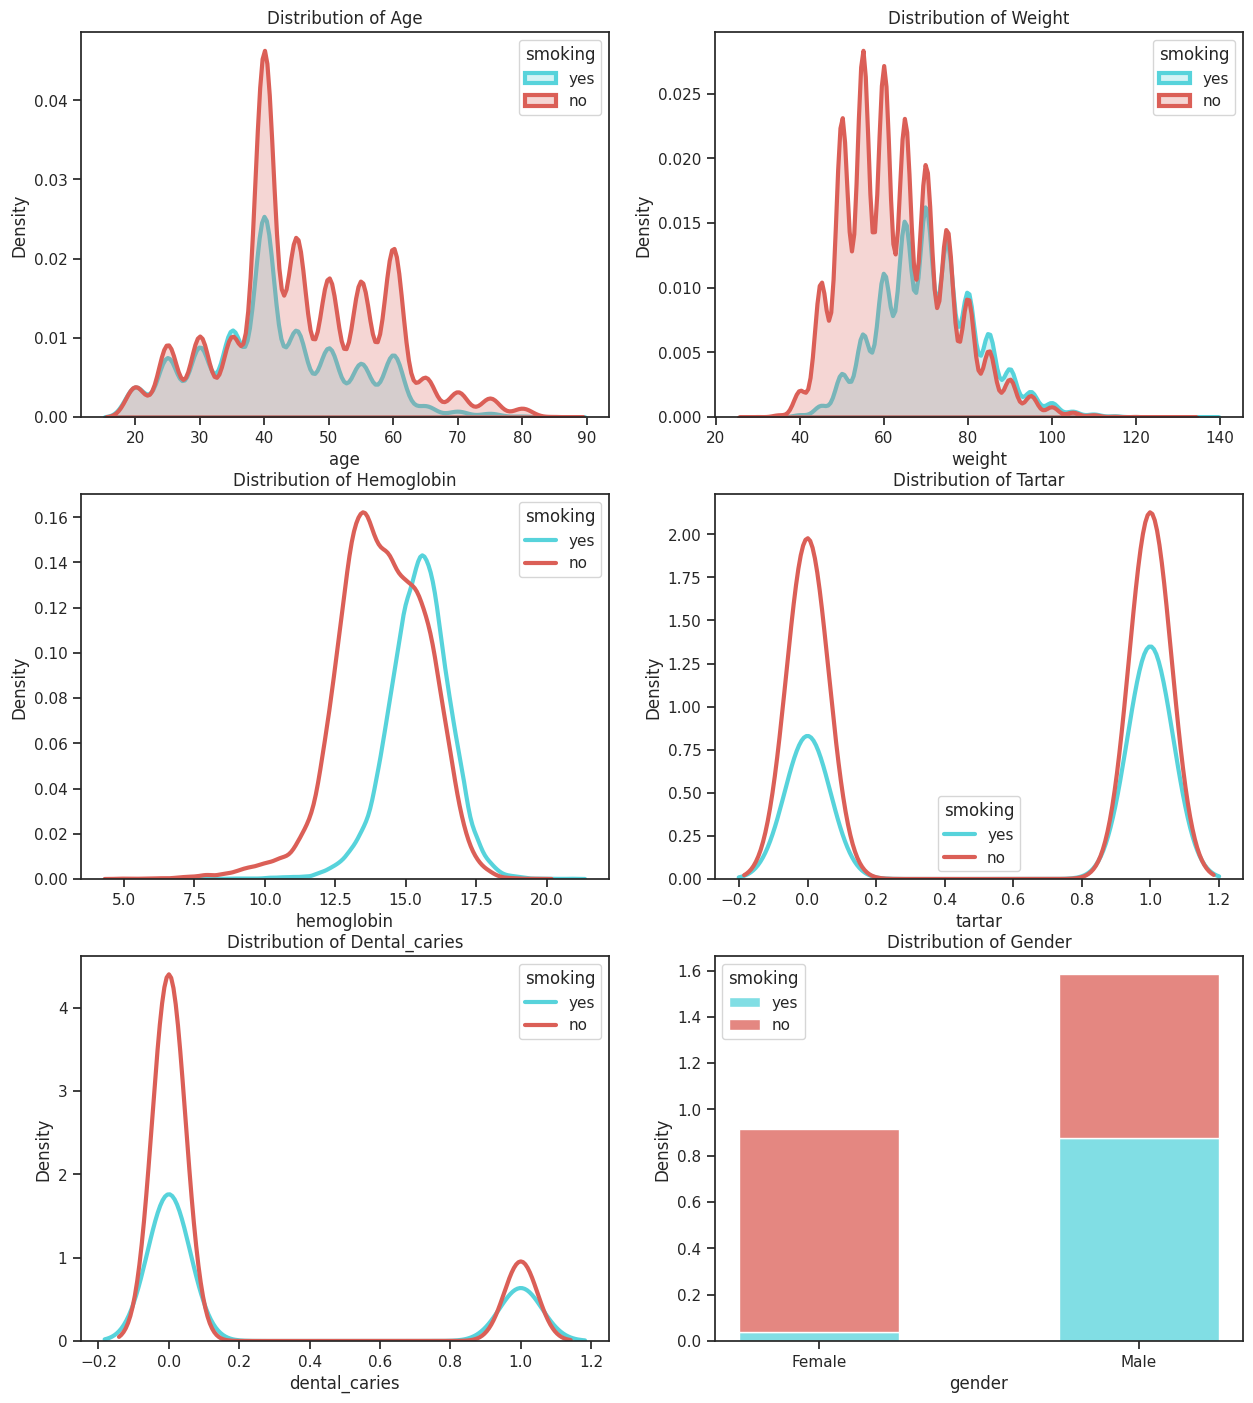

In [70]:
fig = plt.figure(figsize=(15,17))

plt.subplot(321)
sns.kdeplot(data=data, x='age', hue='smoking', palette='hls', linewidth=3, fill=True,)
plt.title('Distribution of Age')
plt.legend(labels=['yes','no'], title='smoking')    
    
plt.subplot(322)
sns.kdeplot(data=data, x='weight', hue='smoking', palette='hls', linewidth=3, fill=True)
plt.legend(labels=['yes','no'], title='smoking')  
plt.title('Distribution of Weight')

plt.subplot(323)
sns.kdeplot(data=data, x='hemoglobin', hue='smoking', palette='hls', linewidth=3, )
plt.legend(labels=['yes','no'], title='smoking')  
plt.title('Distribution of Hemoglobin')

plt.subplot(324)
sns.kdeplot(data=data , x='tartar', hue='smoking', palette='hls', linewidth=3, )
plt.legend(labels=['yes','no'], title='smoking') 
plt.title('Distribution of Tartar')

plt.subplot(325)
sns.kdeplot(data=data, x='dental_caries', hue='smoking', palette='hls', linewidth=3, )
plt.legend(labels=['yes','no'], title='smoking') 
plt.title('Distribution of Dental_caries')

plt.subplot(326)
ax= sns.histplot(data=data, x='gender', hue='smoking', palette='hls', multiple='stack',
                 stat='density', binwidth=.4)
ax.set_xticks([0.2,1])
ax.set_xticklabels(['Female','Male'])
plt.legend(labels=['yes','no'], title='smoking') 
plt.title('Distribution of Gender')
plt.show()


**Distributions of some continuous features w.r.t. gender**

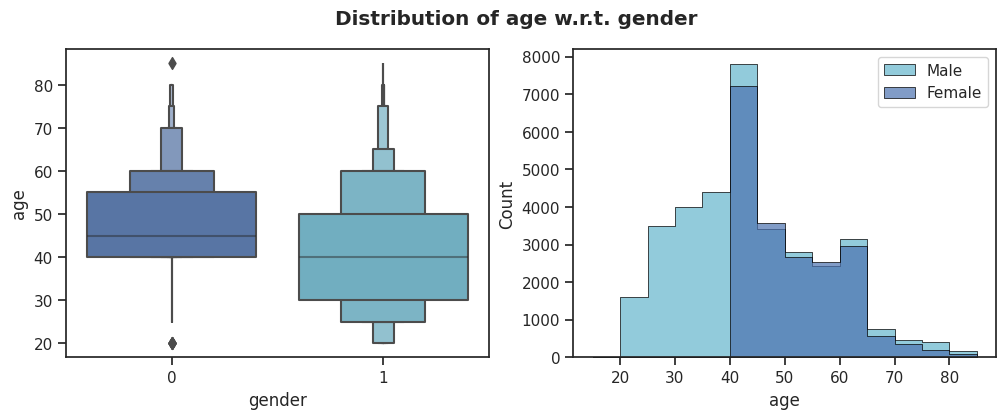

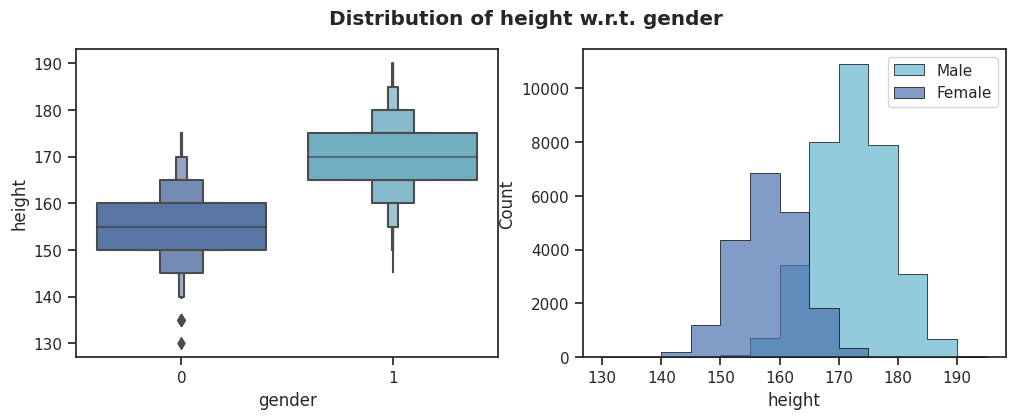

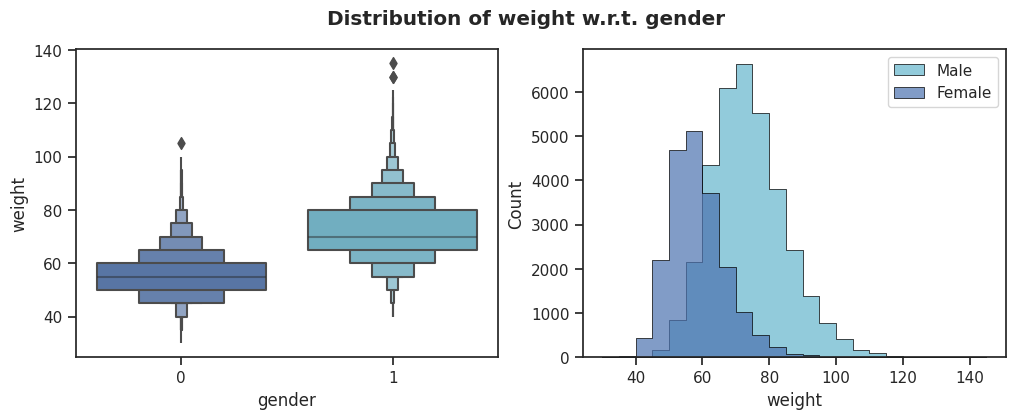

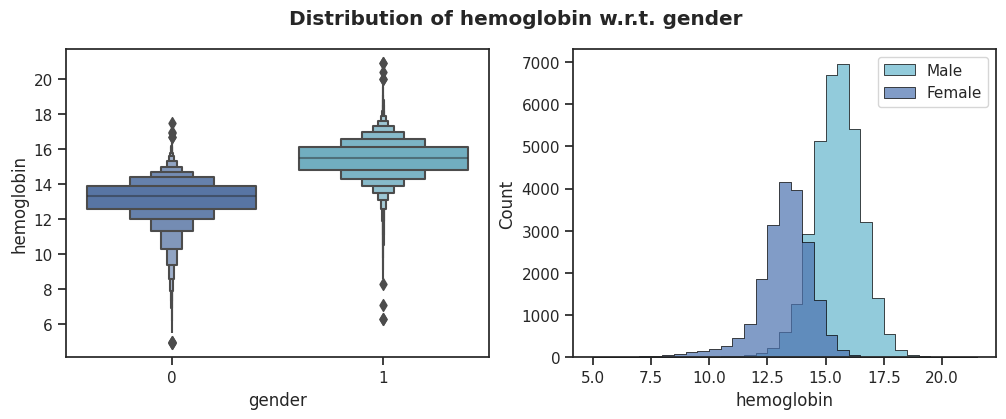

In [43]:
cols_bins = {
    'age': np.arange(15,90,5),
    'height': np.arange(130,200,5),
    'weight': np.arange(30,150,5),
    'hemoglobin':np.arange(5,22,0.5),
}
colors = ['b','c']

for col, bins in cols_bins.items():
    fig, ax = plt.subplots(1,2,figsize=(12,4))

    sns.boxenplot(x=data['gender'], y=data[col], palette=colors, ax=ax[0])
    sns.histplot(data=data,x=col, hue='gender', element='step', linewidth=.5, edgecolor='black',
                 bins=bins, palette=colors, alpha=.7, ax=ax[1])
    plt.legend(labels=['Male','Female'])
    plt.suptitle('Distribution of {} w.r.t. gender'.format(col), fontweight='bold')

In [44]:
print(data.columns)

Index(['gender', 'age', 'height', 'weight', 'waist', 'eyesight_left',
       'eyesight_right', 'hearing_left', 'hearing_right', 'systolic',
       'relaxation', 'fasting_blood_sugar', 'cholesterol', 'triglyceride',
       'hdl', 'ldl', 'hemoglobin', 'urine_protein', 'serum_creatinine', 'ast',
       'alt', 'gtp', 'oral', 'dental_caries', 'tartar', 'smoking'],
      dtype='object')


In [45]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,55076.0,0.633434,0.481871,0.0,0.0,1.0,1.0,1.0
age,55076.0,44.151990,12.040195,20.0,40.0,40.0,55.0,85.0
height,55076.0,164.631055,9.187266,130.0,160.0,165.0,170.0,190.0
weight,55076.0,65.732806,12.669745,30.0,55.0,65.0,75.0,135.0
waist,55076.0,81.925763,9.167680,51.0,75.8,82.0,88.0,129.0
eyesight_left,55076.0,1.013608,0.485997,0.1,0.8,1.0,1.2,9.9
eyesight_right,55076.0,1.007388,0.474578,0.1,0.8,1.0,1.2,9.9
hearing_left,55076.0,1.023749,0.152268,1.0,1.0,1.0,1.0,2.0
hearing_right,55076.0,1.024312,0.154017,1.0,1.0,1.0,1.0,2.0
systolic,55076.0,121.319177,13.476235,71.0,112.0,120.0,130.0,240.0


In [ ]:
data.isna().sum()

**Select Dependent (label) and Independent (estimator) Variables**

In [47]:
from sklearn.model_selection import train_test_split

# Separate the input features (X) and the target variable (y)
X = data.drop('smoking', axis=1)  
y = data['smoking']  

**Split the Dataset into Train and Test Sets**

In [48]:
# Split the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.25)

In [49]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(41307, 25) (41307,)
(13769, 25) (13769,)


**Standardization process**

In [50]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**LogisticRegression**

In [52]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(X_train,y_train)
y_pred1=logit_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
y_pred1

array([0, 0, 0, ..., 0, 0, 0])

In [54]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print("Accuracy is",accuracy_score(y_test,y_pred1))
print("Precision is", precision_score(y_test,y_pred1))
print("Recall is",recall_score(y_test,y_pred1))
print("f1_score is",f1_score(y_test,y_pred1))

Accuracy is 0.7431912266686034
Precision is 0.6438709677419355
Recall is 0.6853050814204434
f1_score is 0.6639422163086866


In [55]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm1 = confusion_matrix(y_test, y_pred1)

# Print confusion matrix
print("Confusion Matrix:")
print(cm1)


Confusion Matrix:
[[6740 1932]
 [1604 3493]]


**Decision Tree**

In [56]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train,y_train)
y_pred2=dt_clf.predict(X_test)

In [57]:
print("Accuracy is",accuracy_score(y_test,y_pred2))
print("Precision is", precision_score(y_test,y_pred2))
print("Recall is",recall_score(y_test,y_pred2))
print("f1_score is",f1_score(y_test,y_pred2))

Accuracy is 0.7811024765778197
Precision is 0.7065238945072377
Recall is 0.6990386501863841
f1_score is 0.7027613412228796


**K-Nearest neighbors**

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred3 = knn.predict(X_test)

print("Accuracy is",accuracy_score(y_test,y_pred3))
print("Precision is", precision_score(y_test,y_pred3))
print("Recall is",recall_score(y_test,y_pred3))
print("f1_score is",f1_score(y_test,y_pred3))

Accuracy is 0.7360011620306486
Precision is 0.6512831125827815
Recall is 0.6174220129487934
f1_score is 0.6339006949340316


In [59]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm3 = confusion_matrix(y_test, y_pred3)

# Print confusion matrix
print("Confusion Matrix:")
print(cm3)


Confusion Matrix:
[[6987 1685]
 [1950 3147]]


**Random Forest Classifier**

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=150, random_state=42)
rf.fit(X_train, y_train)
y_pred4 = rf.predict(X_test)

print("Accuracy is",accuracy_score(y_test,y_pred4))
print("Precision is", precision_score(y_test,y_pred4))
print("Recall is",recall_score(y_test,y_pred4))
print("f1_score is",f1_score(y_test,y_pred4))

Accuracy is 0.8331759750163411
Precision is 0.7675840978593272
Recall is 0.7879144594859722
f1_score is 0.7776164197889439


In [61]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm4 = confusion_matrix(y_test, y_pred4)

# Print confusion matrix
print("Confusion Matrix:")
print(cm4)


Confusion Matrix:
[[7456 1216]
 [1081 4016]]


**Adaboost**

In [62]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost.fit(X_train, y_train)
y_pred5 = adaboost.predict(X_test)

print("Accuracy is",accuracy_score(y_test,y_pred5))
print("Precision is", precision_score(y_test,y_pred5))
print("Recall is",recall_score(y_test,y_pred5))
print("f1_score is",f1_score(y_test,y_pred5))

Accuracy is 0.7609121940591184
Precision is 0.6687862352721152
Recall is 0.7015891701000588
f1_score is 0.6847950976637304


In [63]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm5 = confusion_matrix(y_test, y_pred5)

# Print confusion matrix
print("Confusion Matrix:")
print(cm5)


Confusion Matrix:
[[6901 1771]
 [1521 3576]]


**SGD Model**

In [64]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score


sgd = SGDClassifier(loss='log', random_state=42)
sgd.fit(X_train, y_train)
y_pred6 = sgd.predict(X_test)

print("Accuracy is",accuracy_score(y_test,y_pred6))
print("Precision is", precision_score(y_test,y_pred6))
print("Recall is",recall_score(y_test,y_pred6))
print("f1_score is",f1_score(y_test,y_pred6))

Accuracy is 0.7373810734258116
Precision is 0.6326823149973123
Recall is 0.6927604473219541
f1_score is 0.6613598052069676


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


In [65]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm6 = confusion_matrix(y_test, y_pred6)

# Print confusion matrix
print("Confusion Matrix:")
print(cm6)


Confusion Matrix:
[[6622 2050]
 [1566 3531]]


**XGBoost**

In [66]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=0,n_estimators=150)
xgb_classifier.fit(X_train, y_train)
y_pred7 = xgb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred7)
print("Accuracy is",accuracy_score(y_test,y_pred7))
print("Precision is", precision_score(y_test,y_pred7))
print("Recall is",recall_score(y_test,y_pred7))
print("f1_score is",f1_score(y_test,y_pred7))

Accuracy is 0.7927227830634033
Precision is 0.7197877775594419
Recall is 0.7195050088391278
f1_score is 0.7196463654223967


In [67]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm7 = confusion_matrix(y_test, y_pred7)

# Print confusion matrix
print("Confusion Matrix:")
print(cm7)


Confusion Matrix:
[[7252 1426]
 [1428 3663]]


**Support Vector Classifier Model**

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


svc_classifier = SVC(kernel='rbf', C=1.0, gamma='scale')
svc_classifier.fit(X_train, y_train)
y_pred8 = svc_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred8)
print("Accuracy is",accuracy_score(y_test,y_pred8))
print("Precision is", precision_score(y_test,y_pred8))
print("Recall is",recall_score(y_test,y_pred8))
print("f1_score is",f1_score(y_test,y_pred8))

Accuracy is 0.7281574551528797
Precision is 0.6685756972111554
Recall is 0.5267804590935845
f1_score is 0.5892680785690771


In [69]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm8 = confusion_matrix(y_test, y_pred8)

# Print confusion matrix
print("Confusion Matrix:")
print(cm8)


Confusion Matrix:
[[7341 1331]
 [2412 2685]]
